#  Actividad 4 "Transformadas geométricas y de Fourier"

**Equipo**

Victor Jahaziel Garza Muñoz 2001180

Mauricio Alejandro Olivares Mata 1973006

**Preprocesamiento**





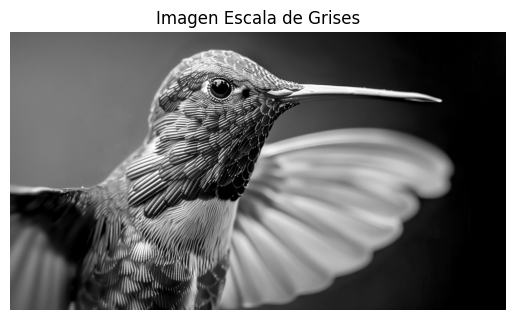

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
ruta_imagen = 'colibri.jpg'  # Cambia esto por el nombre de tu imagen
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)


plt.imshow(imagen, cmap='gray')
plt.title('Imagen Escala de Grises')
plt.axis('off')
plt.show()

# **Aplicación de transformaciones**

**Traslación**

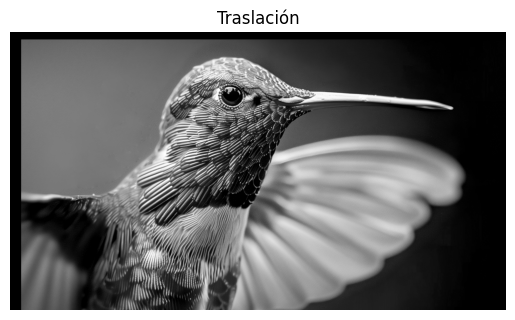

In [11]:
# Definir matriz de traslación
filas, columnas = imagen.shape
matriz_traslacion = np.float32([[1, 0, 120], [0, 1, 80]])
imagen_trasladada = cv2.warpAffine(imagen, matriz_traslacion, (columnas, filas))

plt.imshow(imagen_trasladada, cmap='gray')
plt.title('Traslación')
plt.axis('off')
plt.show()

**Escalado**

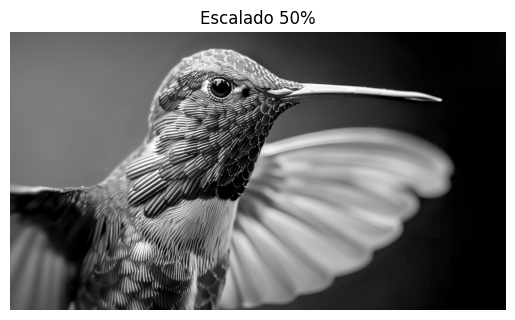

In [16]:
# Escalar al 50% del tamaño original

imagen_escalada = cv2.resize(imagen, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(imagen_escalada, cmap='gray')
plt.title('Escalado 50%')
plt.axis('off')
plt.show()

**Rotación**

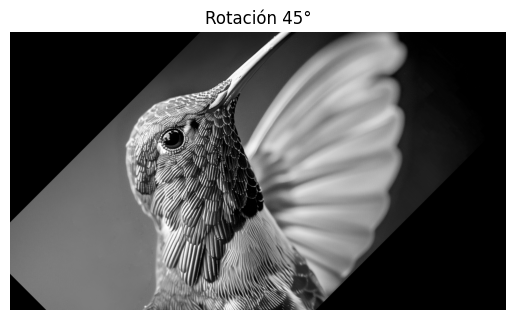

In [17]:
# Rotar 45 grados alrededor del centro de la imagen
centro = (columnas // 2, filas // 2)
matriz_rotacion = cv2.getRotationMatrix2D(centro, 45, 1.0)
imagen_rotada = cv2.warpAffine(imagen, matriz_rotacion, (columnas, filas))

plt.imshow(imagen_rotada, cmap='gray')
plt.title('Rotación 45°')
plt.axis('off')
plt.show()

**Reflexión**

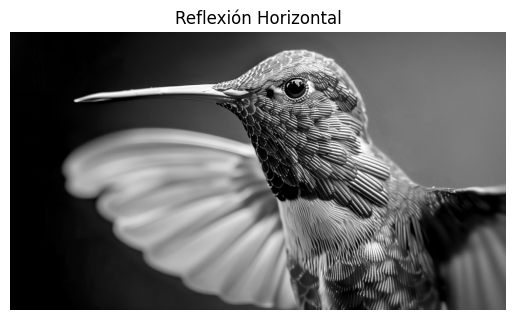

In [18]:
# Reflexión horizontal
imagen_reflejada = cv2.flip(imagen, 1)

plt.imshow(imagen_reflejada, cmap='gray')
plt.title('Reflexión Horizontal')
plt.axis('off')
plt.show()

# **Trasformadas de Fourier**

**Transformación al dominio frecuencial**

In [19]:
# Aplicar DFT (usamos np.fft.fft2 para 2D)
dft = np.fft.fft2(imagen)

# Centrar las frecuencias con fftshift (pone la baja frecuencia al centro)
dft_shift = np.fft.fftshift(dft)

# Obtener magnitud del espectro
magnitud_espectro = np.abs(dft_shift)

# Aplicar logaritmo para visualizar mejor (compresión logarítmica)
espectro_log = np.log(1 + magnitud_espectro)



**Visualición**

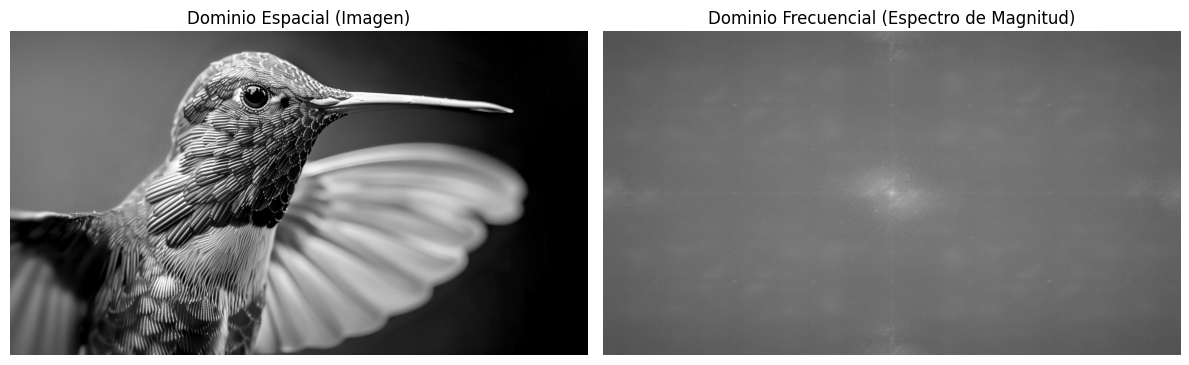

In [20]:
# Mostrar espectro de frecuencias
plt.figure(figsize=(12, 5))

# Imagen original (dominio espacial)
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Dominio Espacial (Imagen)')
plt.axis('off')

# Espectro de frecuencias (dominio frecuencial)
plt.subplot(1, 2, 2)
plt.imshow(espectro_log, cmap='gray')
plt.title('Dominio Frecuencial (Espectro de Magnitud)')
plt.axis('off')

plt.tight_layout()
plt.show()

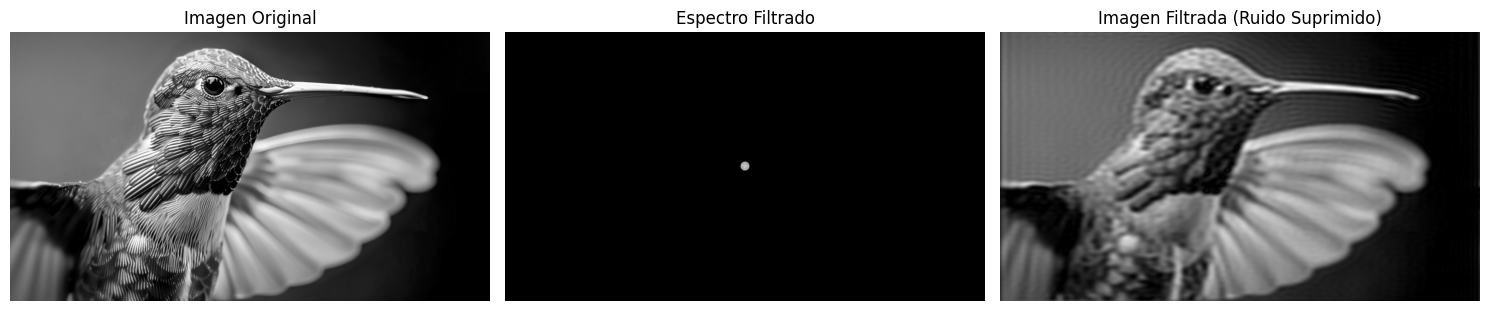

In [21]:
# 1. Aplicar FFT y centrar espectro
dft = np.fft.fft2(imagen)
dft_shift = np.fft.fftshift(dft)

# 2. Crear máscara circular (filtro pasa bajas)
rows, cols = imagen.shape
crow, ccol = rows // 2 , cols // 2  # Centro

# Crear máscara de ceros (negra)
mascara = np.zeros((rows, cols), np.uint8)
radio = 50  # Puedes cambiar este valor según cuántas frecuencias bajas quieras mantener
cv2.circle(mascara, (ccol, crow), radio, 1, thickness=-1)  # Círculo blanco en el centro

# 3. Aplicar máscara
filtro_frecuencia = dft_shift * mascara

# 4. Transformada inversa para reconstruir la imagen
f_ishift = np.fft.ifftshift(filtro_frecuencia)
img_filtrada = np.fft.ifft2(f_ishift)
img_filtrada = np.abs(img_filtrada)

# 5. Visualización
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filtro_frecuencia)), cmap='gray')
plt.title('Espectro Filtrado')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_filtrada, cmap='gray')
plt.title('Imagen Filtrada (Ruido Suprimido)')
plt.axis('off')

plt.tight_layout()
plt.show()